In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model, model_from_json
from tensorflow.keras import layers

In [2]:
file='E:\\RAM\\eye_desices\\OCT2017\\train\\'
#file='/media/ram/New Volume/RAM/New folder/OCT2017/train/'

In [3]:
def shape_data(img):
    img=cv2.resize(img,(128,128))
    img=cv2.normalize(img,None,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img  

In [4]:
for i,j in enumerate(os.listdir(file)):
    print(i,j)

0 CNV
1 DME
2 DRUSEN
3 NORMAL


In [5]:
train=[]
l=0

for k,i in enumerate(os.listdir(file)):
    for j in os.listdir(os.path.join(file,i)):
        l+=1
        img=cv2.imread(os.path.join(file,i,j))
        train.append([shape_data(img),k])
        if l ==1000:
            l=0
            break

In [6]:
len(train[1]),train[1][1],len(train)

(2, 0, 4000)

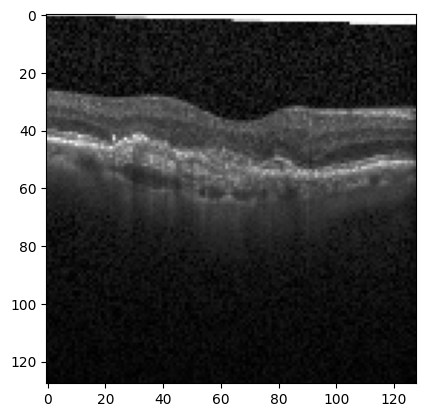

In [7]:
plt.imshow(train[0][0])

In [8]:
import random
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X,y=[],[]
for x, Y in train:
    X.append(x)
    y.append(Y)

X=np.array(X).reshape(-1,128,128,3)
y=le.fit_transform(y)
y=np.array(y)

In [9]:
import numpy as np

np.unique(y),len(np.unique(y))

(array([0, 1, 2, 3], dtype=int64), 4)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

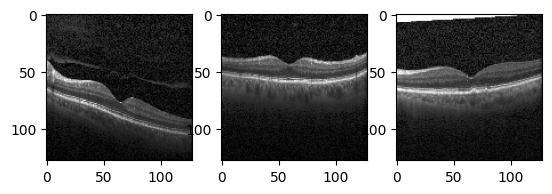

In [15]:
plt.subplot(2,3,1)
plt.imshow(X_train[1])
plt.subplot(2,3,2)
plt.imshow(X_train[2])
plt.subplot(2,3,3)
plt.imshow(X_train[32])

In [25]:
from keras.layers.core import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(128,128,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(204,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='sigmoid')
])

#model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'],optimizer=RMSprop(learning_rate=0.001))
history=model.fit(X_train,y_train,validation_split=0.2,epochs=50,batch_size=50,shuffle=True)
model.save('eye_insepv3-model_1.1.h5')

In [30]:
from tensorflow.keras.models import load_model
model_1=load_model('eye_insepv3-model_2.h5')

In [31]:
res=np.argmax(model_1.predict(X_test[[1]]))
res

1/1 [==============================] - 1s 1s/step


3